To upload local file in google colab

In [2]:
from google.colab import files
# Upload the CSV file from your computer if you are on Google Collab
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


Libraries

In [3]:
import pandas as pd

Preprocess the Data:

Load the IMDB dataset using Keras.
You will notice that the data is a list of integers which we cannot feed into a neural network. We have to turn our lists into tensors.We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence. [3,5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data

Convert the sequences of integers into binary matrices using one-hot encoding. Here’s a hint:


def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1s
    return results


Split the data into training, validation, and test sets.

In [60]:
#Load the IMDB dataset using Keras
from tensorflow.keras.datasets import imdb
import numpy as np

# 1. Load original unprocessed data
(x_raw, y_raw), (x_test_raw, y_test_raw) = imdb.load_data(num_words=10000)

print("Example encoded review:", x_train[0])
print("Label:", y_train[0])

Example encoded review: [1. 1. 0. ... 0. 0. 0.]
Label: 1


In [61]:
# 2. Split BEFORE vectorizing
split_idx = int(len(x_raw) * 0.7)  # 70% train, 30% val

x_train_raw = x_raw[:split_idx]
y_train_raw = y_raw[:split_idx]

x_val_raw = x_raw[split_idx:]
y_val_raw = y_raw[split_idx:]

# 3. Vectorize function
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, [int(x) for x in sequence]] = 1.0
    return results

# 4. Vectorize all splits
x_train = vectorize_sequences(x_train_raw)
x_val = vectorize_sequences(x_val_raw)
x_test = vectorize_sequences(x_test_raw)

# 5. Convert labels
y_train = np.array(y_train_raw).astype("float32")
y_val = np.array(y_val_raw).astype("float32")
y_test = np.array(y_test_raw).astype("float32")

# 6. Final checks
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (17500, 10000)
y_train shape: (17500,)
x_val shape: (7500, 10000)
y_val shape: (7500,)
x_test shape: (25000, 10000)
y_test shape: (25000,)


Build the Model:

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations. We need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), therefore it is best to use the binary_crossentropy loss.

Create a feedforward neural network with:
Two hidden layers using ReLU activation.
An output layer with a sigmoid activation for binary classification.
Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

In [62]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.Sequential([
    layers.Input(shape= (10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer= RMSprop(learning_rate=0.0005),
    loss='binary_crossentropy',  # Because we're doing binary classification
    metrics=['accuracy']
)

Train the Model:

Train the model on the training data for 20 epochs with a batch size of 512.
Use the validation set to monitor performance during training.

In [63]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size= 512,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.7068 - loss: 0.5997 - val_accuracy: 0.8680 - val_loss: 0.3786
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8878 - loss: 0.3339 - val_accuracy: 0.8857 - val_loss: 0.2994
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9155 - loss: 0.2454 - val_accuracy: 0.8921 - val_loss: 0.2730
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9311 - loss: 0.1978 - val_accuracy: 0.8927 - val_loss: 0.2676
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9411 - loss: 0.1692 - val_accuracy: 0.8920 - val_loss: 0.2724
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9488 - loss: 0.1501 - val_accuracy: 0.8893 - val_loss: 0.2845
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9559 - loss: 0.1305 - val_accuracy: 0.8855 - val_loss: 0.2963
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9640 - loss: 0.1123 - val_accuracy: 0.8871 - v

Evaluate the Model:

Plot the training and validation loss and accuracy to detect overfitting.
Retrain the model with an optimal number of epochs to avoid overfitting.
Evaluate the final model on the test set to measure its performance.

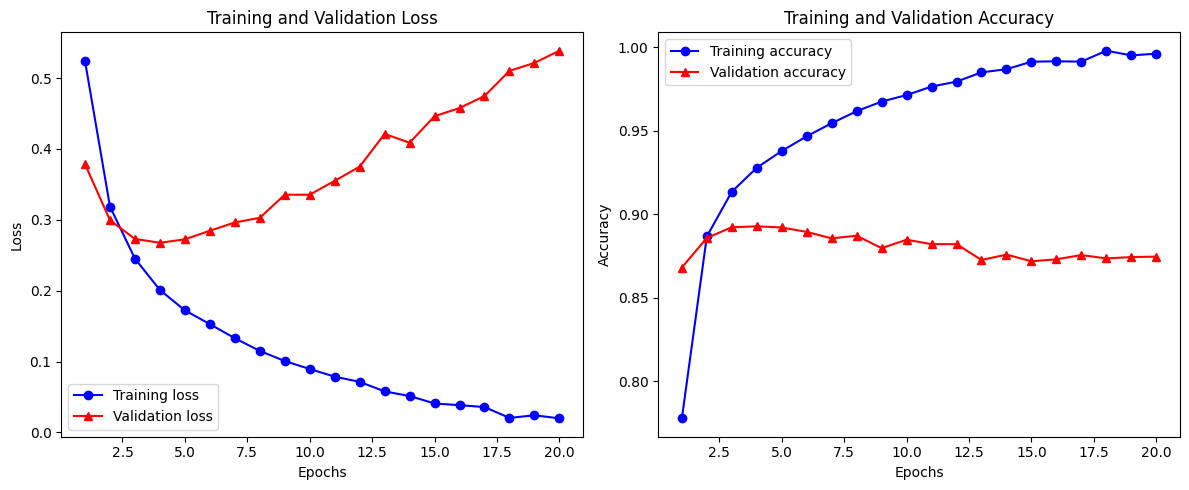

In [64]:
import matplotlib.pyplot as plt

# Extract metrics
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [65]:
# Combine training and validation sets
x_full_train = np.concatenate([x_train, x_val])
y_full_train = np.concatenate([y_train, y_val])

# Retrain model from scratch
model = keras.Sequential([
    keras.layers.Input(shape=(10000,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_full_train, y_full_train,
    epochs=4,          # best number of epochs found
    batch_size=512,
    verbose=1
)

# Evaluate on test set
results = model.evaluate(x_test, y_test)
print(f"Test loss: {results[0]:.4f}, Test accuracy: {results[1]*100:.2f}%")


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7152 - loss: 0.5520
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8976 - loss: 0.2711
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9158 - loss: 0.2203
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9380 - loss: 0.1689
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8666 - loss: 0.3320
Test loss: 0.3331, Test accuracy: 86.70%


5. Analyze Results:

Compare the training and validation metrics to understand the model’s behavior.
Report the final accuracy and loss on the test set.

Training vs. Validation Behavior
The model's training accuracy steadily increased and training loss steadily decreased over 20 epochs.
Validation accuracy peaked around epoch 4, after which it started to decline, and validation loss began to rise.
This behavior clearly indicates the onset of overfitting around epoch 4 — the model began to memorize training data instead of generalizing to unseen samples.

Final Model Strategy
Based on early signs of overfitting, we selected 4 epochs as the optimal stopping point.
The model was retrained from scratch using the combined training and validation sets, to maximize the data used during training.
Test loss: 0.3331, Test accuracy: 86.70%

Summary
The model demonstrates strong performance for a baseline one-hot encoded feedforward network.
Validation monitoring helped prevent overfitting and select the optimal number of epochs.
Retraining on full data improved final results on the test set.
